<h2 style='text-align:center'>CNN - MNIST Handwritten Digits - Classifier</h2>

### Dependencies

In [68]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Load Data

In [69]:
mnist = tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

### Data Normalization

In [70]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

### Building The Model

In [71]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [72]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

### Compile and Train The Model

In [73]:
model.compile(
    
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [75]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0718 - accuracy: 0.9779
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0442 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0331 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0193 - accuracy: 0.9937


### Test The Model

In [78]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


4


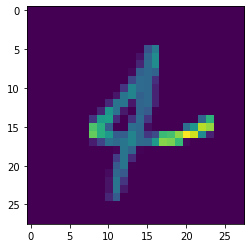

In [83]:
print(np.argmax(predictions[300]))

plt.imshow(X_test[300])